# Tendencies for vertical mixing

In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import seawater as sw
import xarray as xr
import matplotlib.pyplot as plt
import glob

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [3]:
run = 'dpp0060'
path_data = f'/mnt/lustre01/work/mh0287/mh0469/m211054/projects/nextgems/nextgems_cycle1_zstar_diag/experiments/{run}/'

fpath_ckdtree = '/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b9_oce_r0004/ckdtree/rectgrids/r2b9_oce_r0004_res0.30_180W-180E_90S-90N.nc'

In [4]:
mfdset_kwargs = dict(combine='nested', concat_dim='time',
                     data_vars='minimal', coords='minimal', compat='override', join='override',
                     parallel=True,
                    )

In [5]:
exec(open("./dymwin_sims.py").read())
runs = list(Ss.slist.keys())
runs_all = runs.copy()
runs.remove('dpp0063')
runs, runs_all

(['dpp0060', 'dpp0062', 'dpp0065'],
 ['dpp0060', 'dpp0062', 'dpp0063', 'dpp0065'])

## Load prepared data

In [6]:
path_scratch = f'/scratch/m/m300602/dymwin/'

In [7]:
for run in runs_all:
    print(run)
    Ss[run].ds_3d = xr.open_dataset(f'{path_scratch}/pp_dymwin_extract_points_3d_{run}.nc')
    Ss[run].ds_tsbal = xr.open_dataset(f'{path_scratch}/pp_dymwin_extract_points_tsbal_{run}.nc')
for run in runs:
    print(run)
    Ss[run].ds_tke = xr.open_dataset(f'{path_scratch}/pp_dymwin_extract_points_tke_{run}.nc')

dpp0060
dpp0062
dpp0063
dpp0065
dpp0060
dpp0062
dpp0065


## Plot overview

<IPython.core.display.Javascript object>


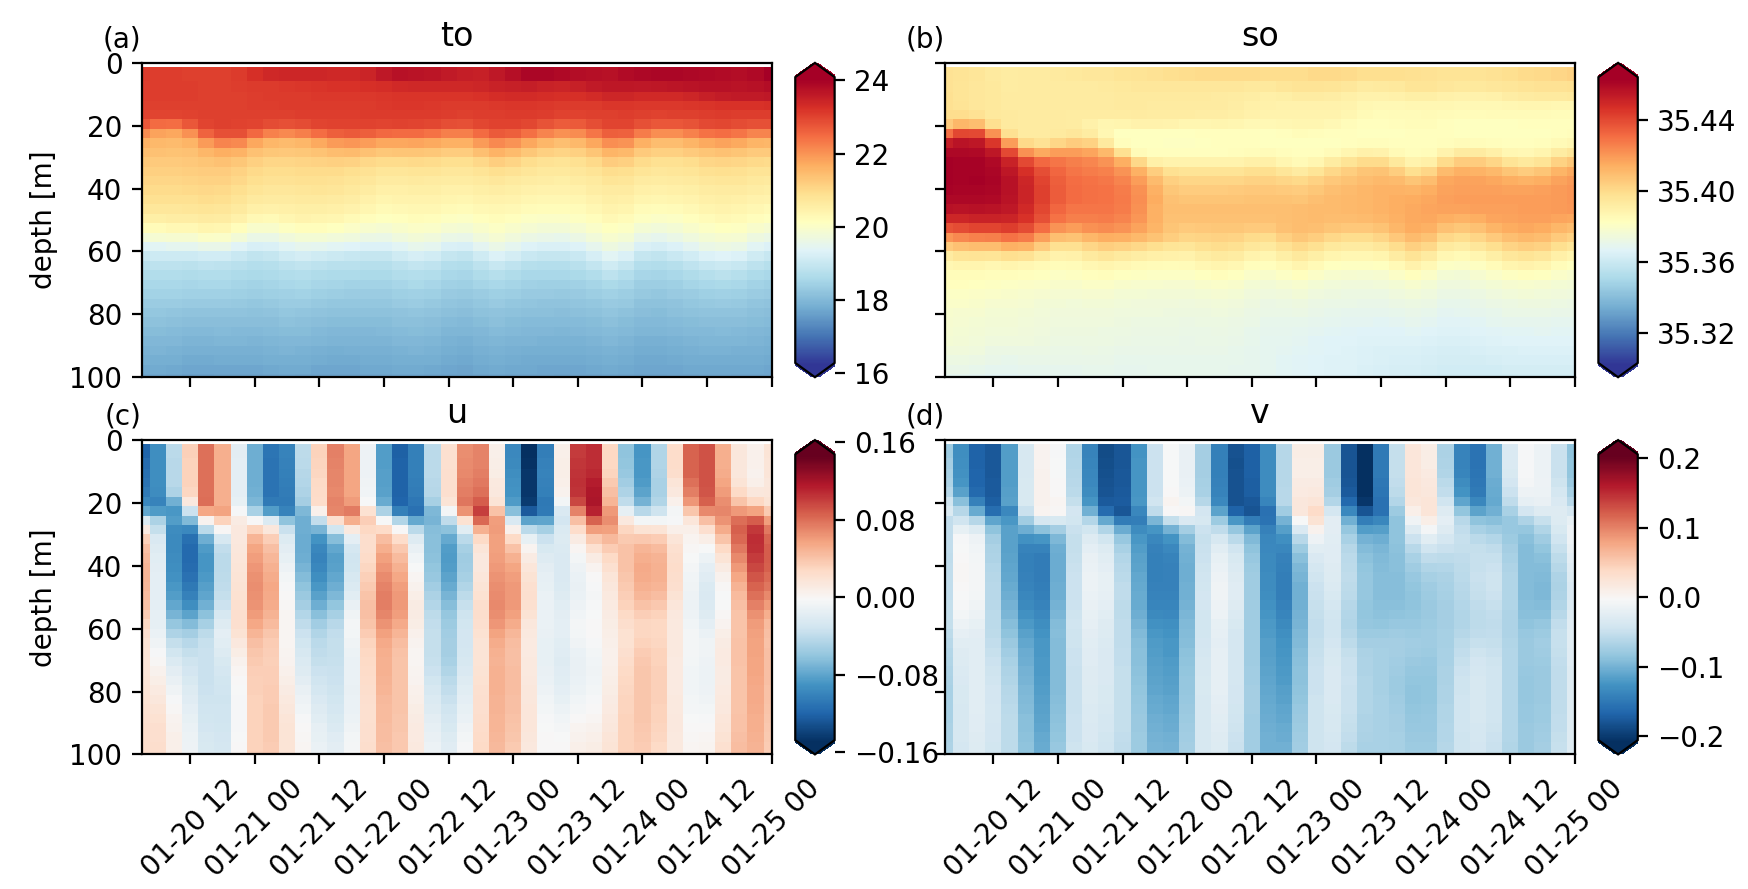

/home/m/m300602/pyicon/pyicon/pyicon_plotting.py:671: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax.locator_params(nbins=5)
/home/m/m300602/pyicon/pyicon/pyicon_plotting.py:671: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax.locator_params(nbins=5)


In [86]:
hca, hcb = pyic.arrange_axes(2, 2, asp=0.5, fig_size_fac=1, 
                             sharex=True, sharey=True, plot_cb=True,
                             xlabel='time',
                             ylabel='depth [m]',
                             dfigb=0.5,
                            )
ii=-1

tslice = slice(0,None)

ds = Ss['dpp0060'].ds_3d
time = ds.time
depth = ds.depth
depth_2 = ds.depth_2
# ds = S.ds

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth, ds.to.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, clim=[ds.to.min(), ds.to.max()])
ax.set_title('to')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth, ds.so.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, clim=[ds.so.min(), ds.so.max()])
ax.set_title('so')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth, ds.u.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, clim=np.abs(ds.u.data).max())
ax.set_title('u')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth, ds.v.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, clim=np.abs(ds.v.data).max())
ax.set_title('v')

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# pyic.shade(time[tslice], depth_2, ds.tke.isel(time=tslice, ncells=0).data.transpose(), ax=ax, cax=cax, logplot=True, clim=[-6, -3.6])
# ax.set_title('tke')

# ii+=1; ax=hca[ii]; cax=hcb[ii]
# pyic.shade(time[tslice], depth_2, ds.A_tracer_v_to.isel(time=tslice, ncells=0).data.transpose(), ax=ax, cax=cax, logplot=True, clim=[-6, 0])
# ax.set_title('A_tracer_v_to')

for ax in hca:
    ax.set_ylim(100,0)
    ax.tick_params(axis='x', rotation=45)

<IPython.core.display.Javascript object>


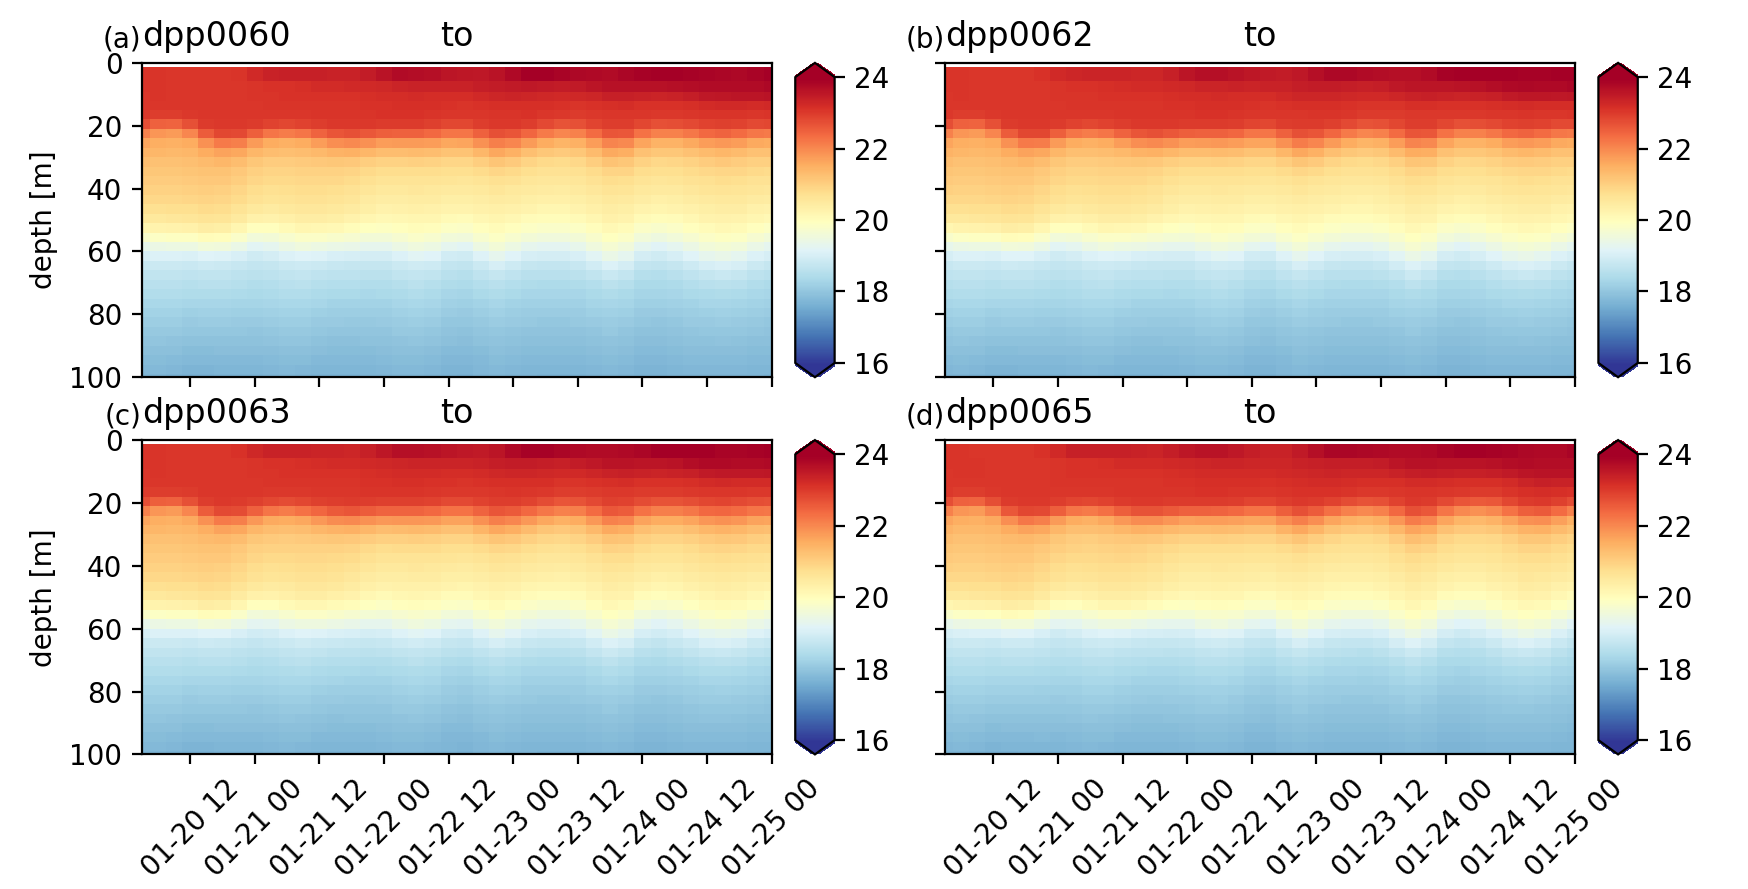

In [87]:
hca, hcb = pyic.arrange_axes(2, 2, asp=0.5, fig_size_fac=1, 
                             sharex=True, sharey=True, plot_cb=True,
                             xlabel='time',
                             ylabel='depth [m]',
                             dfigb=0.5,
                            )
ii=-1

tslice = slice(0,40)

for run in runs_all:
#     ds = Ss[run].ds - Ss['dpp0060'].ds
    ds = Ss[run].ds_3d
    
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(time[tslice], depth, ds.to.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, 
#                clim=[ds.to.min(), ds.to.max()],
               clim=[16,24],
#                clim='sym',
              )
    ax.set_title('to')
    ax.set_title(run, loc='left')
    
    
for ax in hca:
    ax.set_ylim(100,0)
    ax.tick_params(axis='x', rotation=45)

In [95]:
hca, hcb = pyic.arrange_axes(2, 2, asp=0.5, fig_size_fac=1, 
                             sharex=True, sharey=True, plot_cb=True,
                             xlabel='time',
                             ylabel='depth [m]',
                             dfigb=0.5,
                            )
ii=-1

tslice = slice(0,40)

for run in runs_all:
    ds = Ss[run].ds_3d - Ss['dpp0060'].ds_3d
    
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(time[tslice], depth, ds.to.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, 
               clim=0.1,
              )
    ax.set_title('to', loc='right')
    ax.set_title(f'{run}-dpp0060', loc='left')
    
    
for ax in hca:
    ax.set_ylim(100,0)
    ax.tick_params(axis='x', rotation=45)

<IPython.core.display.Javascript object>

In [89]:
hca, hcb = pyic.arrange_axes(2, 2, asp=0.5, fig_size_fac=1, 
                             sharex=True, sharey=True, plot_cb=True,
                             xlabel='time',
                             ylabel='depth [m]',
                             dfigb=0.5,
                            )
ii=-1

tslice = slice(0,40)

for run in runs_all:
    ds = Ss[run].ds_3d
    
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(time[tslice], depth, ds.u.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, 
               clim=0.2,
              )
    ax.set_title('u')
    ax.set_title(run, loc='left')
    
    
for ax in hca:
    ax.set_ylim(100,0)
    ax.tick_params(axis='x', rotation=45)

<IPython.core.display.Javascript object>

In [90]:
hca, hcb = pyic.arrange_axes(1, 3, asp=0.5, fig_size_fac=1, 
                             sharex=True, sharey=True, plot_cb=True,
                             xlabel='time',
                             ylabel='depth [m]',
                             dfigb=0.5,
                            )
ii=-1

tslice = slice(0,40)

for run in runs:
#     ds = Ss[run].ds - Ss['dpp0060'].ds
    ds = Ss[run].ds_tke
    
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(time[tslice], depth_2, ds.tke.isel(time=tslice, ncells=0).data.transpose(), ax=ax, cax=cax, 
#                clim=[ds.to.min(), ds.to.max()],
               clim=[-6,-4],
#                clim='sym',
               logplot=True,
              )
    ax.set_title('tke')
    ax.set_title(run, loc='left')
    
    
for ax in hca:
    ax.set_ylim(100,0)
    ax.tick_params(axis='x', rotation=45)

<IPython.core.display.Javascript object>

## Get a cluster

In [5]:
import multiprocessing
from dask_jobqueue import SLURMCluster # Setting up distributed memories via slurm
from dask.utils import format_bytes
from dask.distributed import Client, LocalCluster, progress # Libaray to orchestrate distributed resources

from tempfile import NamedTemporaryFile, TemporaryDirectory # Creating temporary Files/Dirs
from getpass import getuser # Libaray to copy things
from pathlib import Path # Object oriented libary to deal with paths

In [89]:
# Set some user specific variables
account_name = 'mh0033' # Account that is going to be 'charged' fore the computation
queue = 'compute,compute2' # Name of the partition we want to use
job_name = 'PostProc' # Job name that is submitted via sbatch
memory = "100GiB" # Max memory per node that is going to be used - this depends on the partition
cores = 24 # Max number of cores per task that are reserved - also partition dependend
walltime = '8:00:00' # Walltime - also partition dependent

In [90]:
scratch_dir = Path('/scratch') / getuser()[0] / getuser() # Define the users scratch dir
# Create a temp directory where the output of distributed cluster will be written to, after this notebook
# is closed the temp directory will be closed
dask_tmp_dir = TemporaryDirectory(dir=scratch_dir, prefix=job_name)
cluster = SLURMCluster(memory=memory,
                       cores=cores,
                       project=account_name,
                       walltime=walltime,
                       queue=queue,
                       name=job_name,
                       scheduler_options={'dashboard_address': ':8787'},
                       local_directory=dask_tmp_dir.name,
                       job_extra=[f'-J {job_name}', 
                                  f'-D {dask_tmp_dir.name}',
                                  f'--begin=now',
                                  f'--output={dask_tmp_dir.name}/LOG_cluster.%j.o',
                                  f'--output={dask_tmp_dir.name}/LOG_cluster.%j.o'
                                 ],
                       interface='ib0')

/work/mh0033/m300602/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41217 instead
  warnings.warn(


In [91]:
print(cluster.job_script())

#!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p compute,compute2
#SBATCH -A mh0033
#SBATCH -n 1
#SBATCH --cpus-per-task=24
#SBATCH --mem=100G
#SBATCH -t 8:00:00
#SBATCH -J PostProc
#SBATCH -D /scratch/m/m300602/PostProckm4zzwz6
#SBATCH --begin=now
#SBATCH --output=/scratch/m/m300602/PostProckm4zzwz6/LOG_cluster.%j.o
#SBATCH --output=/scratch/m/m300602/PostProckm4zzwz6/LOG_cluster.%j.o

/work/mh0033/m300602/miniconda3/envs/pyicon_py39/bin/python -m distributed.cli.dask_worker tcp://10.50.32.31:43575 --nthreads 4 --nprocs 6 --memory-limit 16.67GiB --name dummy-name --nanny --death-timeout 60 --local-directory /scratch/m/m300602/PostProckm4zzwz6 --interface ib0 --protocol tcp://



In [92]:
cluster.scale(jobs=2)
cluster

In [96]:
! squeue -u $USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          34280875  compute2 exp.smtw  m300602 PD       0:00    451 (Resources)
          34298324 compute,c PostProc  m300602 PD       0:00      1 (Resources)
          34298325 compute,c PostProc  m300602 PD       0:00      1 (Resources)
          34298338  compute2   pydask  m300602  R       3:49      1 m21250


In [11]:
client = Client(cluster)
client

<Client: 'tcp://10.50.32.31:40942' processes=0 threads=0, memory=0 B>

## Prepare data

In [13]:
ds_ckdt = xr.open_dataset(fpath_ckdtree)
ds_ckdt

<xarray.Dataset>
Dimensions:     (lat: 600, lon: 1200)
Coordinates:
  * lat         (lat) float64 -90.0 -89.7 -89.4 -89.1 ... 88.8 89.1 89.4 89.7
  * lon         (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
Data variables:
    dckdtree_c  (lat, lon) float64 ...
    ickdtree_c  (lat, lon) int64 ...
    dckdtree_e  (lat, lon) float64 ...
    ickdtree_e  (lat, lon) int64 ...
    dckdtree_v  (lat, lon) float64 ...
    ickdtree_v  (lat, lon) int64 ...

In [67]:
fpath_tgrid = '/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b9_oce_r0004/r2b9_oce_r0004_tgrid.nc'
ds_tg = xr.open_dataset(fpath_tgrid)
clon = ds_tg.clon*180./np.pi
clat = ds_tg.clat*180./np.pi
clon = clon.data
clat = clat.data
elon = ds_tg.elon*180./np.pi
elat = ds_tg.elat*180./np.pi
elon = elon.data
elat = elat.data

sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray


In [69]:
# lon0 = np.array([-140, -30, 0, -180, -140])
# lat0 = np.array([-30, 26, -60, -15, 0])
lon0 = np.array([-140])
lat0 = np.array([-30])

ic = np.argmin( (clon-lon0[:,np.newaxis])**2 + (clat-lat0[:,np.newaxis])**2, axis=1)
print(clon[ic], clat[ic], ic)
ie = np.argmin( (elon-lon0[:,np.newaxis])**2 + (elat-lat0[:,np.newaxis])**2, axis=1)
print(elon[ic], elat[ic], ie)

[-140.01093824] [-30.00009559] [8883351]
[-106.39022404] [2.48050187] [13365203]


In [16]:
%%time
flist = glob.glob(f'{path_data}/{run}_oce_3du200m_PT3H_202001*.nc')
flist.sort()
ds_3d = xr.open_mfdataset(flist, **mfdset_kwargs, chunks=dict(time=1, depth=1, depth_2=1))

flist = glob.glob(f'{path_data}/{run}_oce_tkeu200m_PT3H_202001*.nc')
flist.sort()
ds_tke = xr.open_mfdataset(flist, **mfdset_kwargs, chunks=dict(time=1, depth=1, depth_2=1))
ds_tke = ds_tke.rename(depth='depth_2')

flist = glob.glob(f'{path_data}/{run}_oce_tsbalu200m_PT3H_202001*.nc')
flist.sort()
ds_tsbal = xr.open_mfdataset(flist, **mfdset_kwargs, chunks=dict(time=1, depth=1, depth_2=1))

CPU times: user 1.73 s, sys: 317 ms, total: 2.04 s
Wall time: 22.5 s


In [17]:
ds_3d

<xarray.Dataset>
Dimensions:        (depth: 60, depth_2: 60, ncells: 14886338, ncells_2: 22375924, time: 40)
Coordinates:
  * depth          (depth) float64 3.5 8.0 10.5 13.5 ... 185.5 190.5 195.5 200.5
  * depth_2        (depth_2) float64 0.0 7.0 9.0 12.0 ... 188.0 193.0 198.0
  * time           (time) datetime64[ns] 2020-01-20T03:00:00 ... 2020-01-25
Dimensions without coordinates: ncells, ncells_2
Data variables:
    to             (time, depth, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    so             (time, depth, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    u              (time, depth, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    v              (time, depth, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    w              (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    A_tracer_v_to  (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    A_veloc_v      (time, depth_2, ncells_2) float32 dask.array<chunksize=(1, 1, 22375924), meta=np.ndarray>
    tke            (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    number_of_grid_used:  16
    uuidOfHGrid:          375cb0cc-637e-11e8-9d6f-8f41a9b9ff4b
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@9b3ffd569bd42f...
    history:              /mnt/lustre01/work/mh0287/mh0469/m211054/projects/n...
    references:           see MPIM/DWD publications
    comment:              Helmuth Haak (m211054) on m20876 (Linux 2.6.32-754....

In [18]:
ds_tke

<xarray.Dataset>
Dimensions:        (depth_2: 60, ncells: 14886338, time: 40)
Coordinates:
  * depth_2        (depth_2) float64 0.0 7.0 9.0 12.0 ... 188.0 193.0 198.0
  * time           (time) datetime64[ns] 2020-01-20T03:00:00 ... 2020-01-25
Dimensions without coordinates: ncells
Data variables: (12/14)
    tke            (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    cvmix_dummy_1  (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    cvmix_dummy_2  (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    cvmix_dummy_3  (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    tke_Tbpr       (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    tke_Tspr       (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    ...             ...
    tke_Twin       (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    tke_Tiwf       (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    tke_Tbck       (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    tke_Ttot       (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    tke_Lmix       (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
    tke_Pr         (time, depth_2, ncells) float32 dask.array<chunksize=(1, 1, 14886338), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  16
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    uuidOfHGrid:          375cb0cc-637e-11e8-9d6f-8f41a9b9ff4b
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@9b3ffd569bd42f...
    history:              /mnt/lustre01/work/mh0287/mh0469/m211054/projects/n...
    references:           see MPIM/DWD publications
    comment:              Helmuth Haak (m211054) on m20876 (Linux 2.6.32-754....

In [34]:
ds = ds_3d[['to', 'so', 'tke', 'u', 'v', 'A_tracer_v_to']]
ds = ds.isel(ncells=ic)

In [19]:
path_scratch = f'/scratch/m/m300602/dymwin/'

In [ ]:
%%time
# for var in ds_tke.keys():
#     print(var)
#     da = ds_tke[var].isel(ncells=ic)
#     da.to_netcdf(f'{path_scratch}/dymwin_tke_tsbal_tend_{var}.nc')
ds_tke_sel = ds_tke.isel(ncells=ic)
ds_tke_sel.to_netcdf(f'{path_scratch}/dymwin_tke_tsbal_tend_tkebal.nc')
# ds_tke_sel = ds_tke_sel.compute()

In [74]:
%%time
A_veloc_v = ds_3d['A_veloc_v'].isel(ncells_2=ie)
A_veloc_v = A_veloc_v.compute()

KilledWorker: ('open_dataset-5a554ddb69ea44dab1e2aa3117c0ec49A_veloc_v-f42aeaf9cb736c581fd6d0a2b7b731d0', <WorkerState 'tcp://10.50.34.181:36762', name: 1-5, memory: 0, processing: 43>)

In [ ]:
ds_tke_sel.to_netcdf('ds_tke_sel.nc')

In [98]:
ds = xr.open_dataset(f'{path_scratch}/dymwin_tke_tsbal_tend_tkebal.nc')
ds

<xarray.Dataset>
Dimensions:        (depth_2: 60, ncells: 1, time: 40)
Coordinates:
  * depth_2        (depth_2) float64 0.0 7.0 9.0 12.0 ... 188.0 193.0 198.0
  * time           (time) datetime64[ns] 2020-01-20T03:00:00 ... 2020-01-25
Dimensions without coordinates: ncells
Data variables: (12/14)
    tke            (time, depth_2, ncells) float32 ...
    cvmix_dummy_1  (time, depth_2, ncells) float32 ...
    cvmix_dummy_2  (time, depth_2, ncells) float32 ...
    cvmix_dummy_3  (time, depth_2, ncells) float32 ...
    tke_Tbpr       (time, depth_2, ncells) float32 ...
    tke_Tspr       (time, depth_2, ncells) float32 ...
    ...             ...
    tke_Twin       (time, depth_2, ncells) float32 ...
    tke_Tiwf       (time, depth_2, ncells) float32 ...
    tke_Tbck       (time, depth_2, ncells) float32 ...
    tke_Ttot       (time, depth_2, ncells) float32 ...
    tke_Lmix       (time, depth_2, ncells) float32 ...
    tke_Pr         (time, depth_2, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    number_of_grid_used:  16
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    uuidOfHGrid:          375cb0cc-637e-11e8-9d6f-8f41a9b9ff4b
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@9b3ffd569bd42f...
    history:              /mnt/lustre01/work/mh0287/mh0469/m211054/projects/n...
    references:           see MPIM/DWD publications
    comment:              Helmuth Haak (m211054) on m20876 (Linux 2.6.32-754....

In [100]:
hca, hcb = pyic.arrange_axes(4,4, plot_cb=True, fig_size_fac=2., sharex=True, sharey=True)
ii=-1

clim = 1e-8
for var in ds.keys():
    if var.startswith('tke_T'):
        ii+=1; ax=hca[ii]; cax=hcb[ii]
        ds[var].plot(y='depth_2', yincrease=False, 
                         ax=ax, cbar_kwargs=dict(cax=cax),
                     vmin=-clim,
                     vmax=clim,
                     cmap='RdBu_r'
                        )

ii+=1; ax=hca[ii]; cax=hcb[ii]
var = 'tke'
ds[var].plot(y='depth_2', yincrease=False, 
             ax=ax, cbar_kwargs=dict(cax=cax),
             vmin=0,
             vmax=1e-4,
             cmap='RdYlBu_r'
                )

ii+=1; ax=hca[ii]; cax=hcb[ii]
var = 'tke_Lmix'
ds[var].plot(y='depth_2', yincrease=False, 
             ax=ax, cbar_kwargs=dict(cax=cax),
#              vmin=-clim,
#              vmax=clim,
             cmap='RdYlBu_r'
                )

ii+=1; ax=hca[ii]; cax=hcb[ii]
var = 'tke_Pr'
ds[var].plot(y='depth_2', yincrease=False, 
             ax=ax, cbar_kwargs=dict(cax=cax),
#              vmin=-clim,
#              vmax=clim,
             cmap='RdYlBu_r'
                )

ii+=1; ax=hca[ii]; cax=hcb[ii]
var = 'cvmix_dummy_3'
ds[var].plot(y='depth_2', yincrease=False, 
             ax=ax, cbar_kwargs=dict(cax=cax),
#              vmin=-clim,
#              vmax=clim,
             cmap='RdYlBu_r'
                )

ii+=1; ax=hca[ii]; cax=hcb[ii]
var = 'cvmix_dummy_1'
ds[var].plot(y='depth_2', yincrease=False, 
             ax=ax, cbar_kwargs=dict(cax=cax),
#              vmin=-clim,
#              vmax=clim,
             cmap='RdYlBu_r'
                )

ii+=1; ax=hca[ii]; cax=hcb[ii]
da = ds['cvmix_dummy_1']*ds['tke_Pr']
da.plot(y='depth_2', yincrease=False, 
             ax=ax, cbar_kwargs=dict(cax=cax),
#              vmin=-clim,
#              vmax=clim,
             cmap='RdYlBu_r'
                )

for ax, cax in zip(hca, hcb):
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(cax.get_ylabel())
    cax.set_ylabel('')
    ax.set_ylim(30,0)

<IPython.core.display.Javascript object>

In [41]:
cax.get_ylabel()

'TKE tend bpr [m2 s-3]'

In [35]:
%%time 
ds = ds.compute()

CPU times: user 5min 42s, sys: 11min 51s, total: 17min 33s
Wall time: 17min 48s


In [36]:
%%time
ds.to_netcdf('bcp.nc')

CPU times: user 13.7 s, sys: 1min 1s, total: 1min 14s
Wall time: 1min 36s


## Plot the data

In [37]:
ic

array([8883351])

In [49]:
time = ds.time
depth = ds.depth
depth_2 = ds.depth_2

<IPython.core.display.Javascript object>


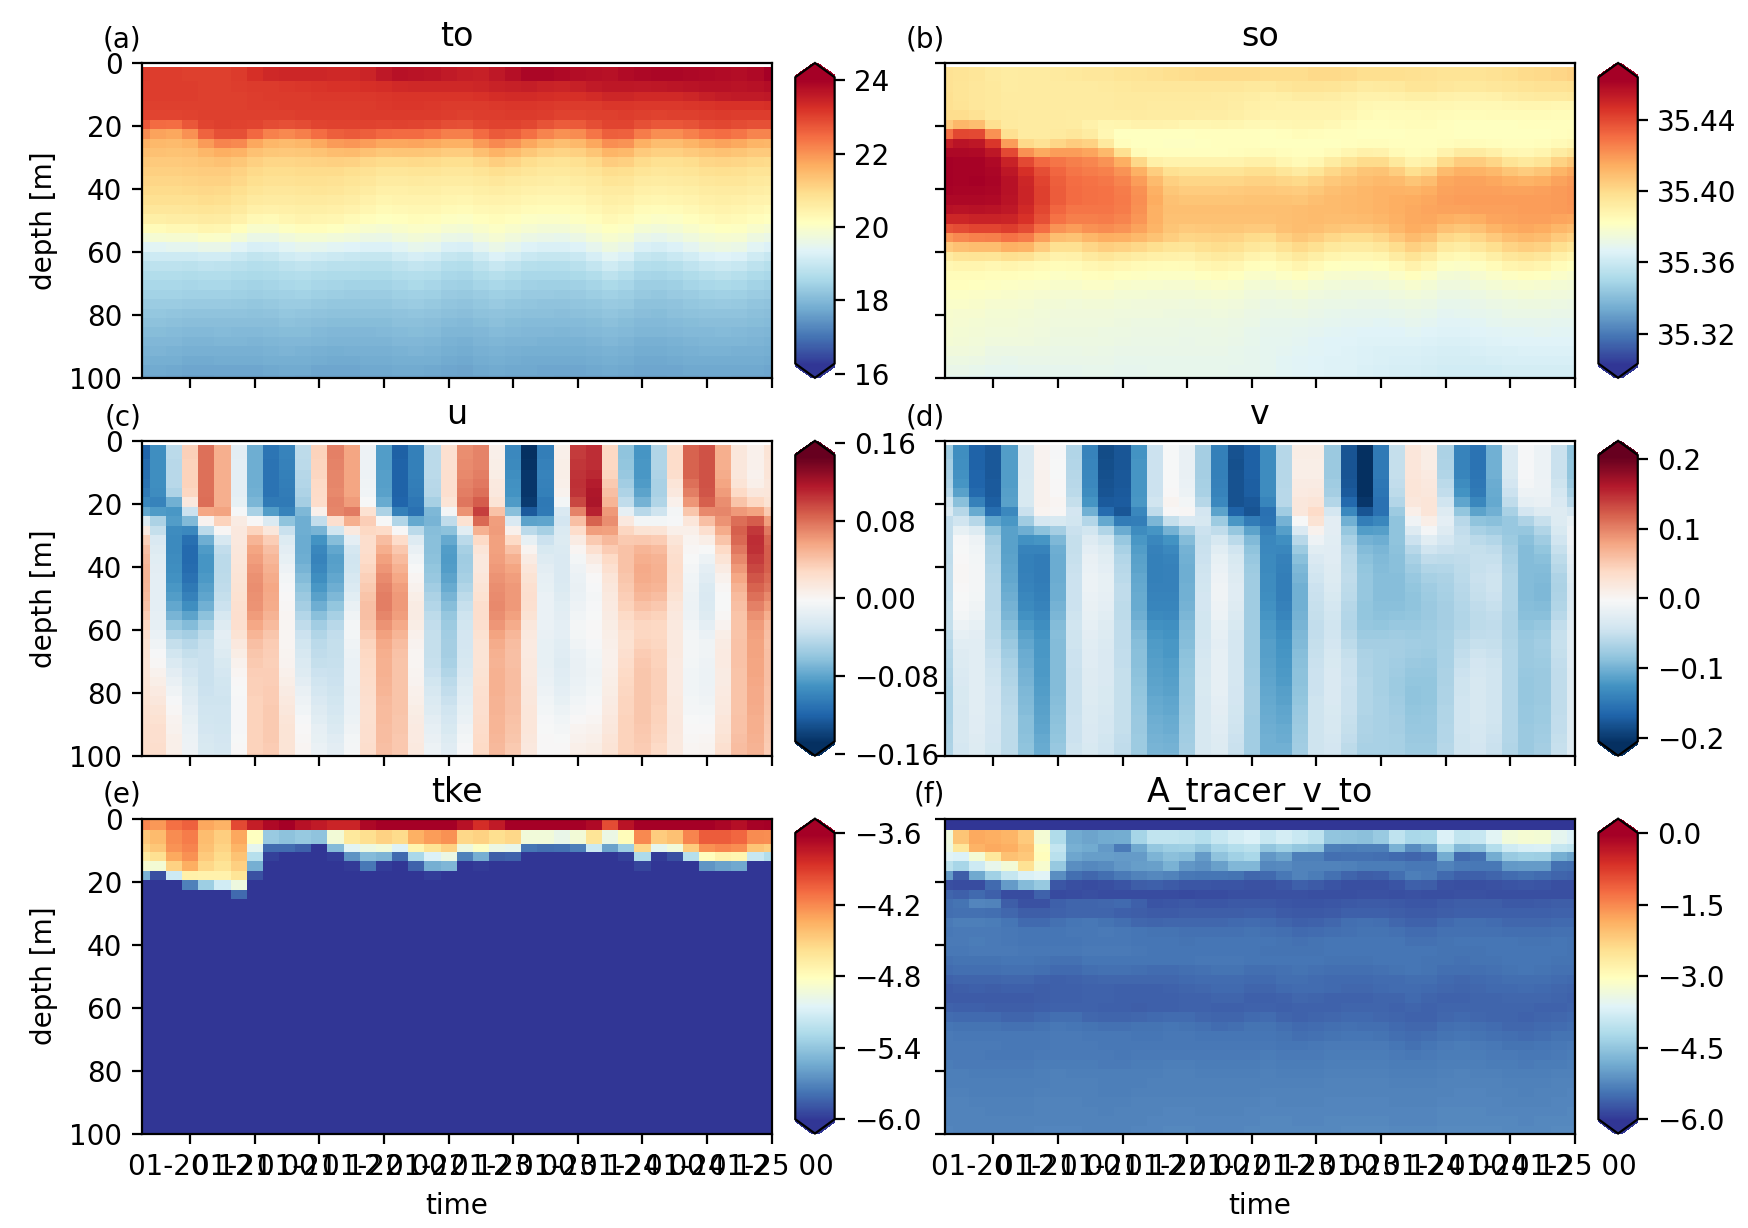

/home/m/m300602/pyicon/pyicon/pyicon_plotting.py:671: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  ax.locator_params(nbins=5)
/home/m/m300602/pyicon/pyicon/pyicon_plotting.py:671: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  ax.locator_params(nbins=5)


In [91]:
hca, hcb = pyic.arrange_axes(2, 3, asp=0.5, fig_size_fac=1, 
                             sharex=True, sharey=True, plot_cb=True,
                             xlabel='time',
                             ylabel='depth [m]',
                            )
ii=-1

tslice = slice(0,None)

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth, ds.to.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, clim=[ds.to.min(), ds.to.max()])
ax.set_title('to')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth, ds.so.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, clim=[ds.so.min(), ds.so.max()])
ax.set_title('so')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth, ds.u.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, clim=np.abs(ds.u.data).max())
ax.set_title('u')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth, ds.v.isel(time=tslice, ncells=0).transpose(), ax=ax, cax=cax, clim=np.abs(ds.v.data).max())
ax.set_title('v')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth_2, ds.tke.isel(time=tslice, ncells=0).data.transpose(), ax=ax, cax=cax, logplot=True, clim=[-6, -3.6])
ax.set_title('tke')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(time[tslice], depth_2, ds.A_tracer_v_to.isel(time=tslice, ncells=0).data.transpose(), ax=ax, cax=cax, logplot=True, clim=[-6, 0])
ax.set_title('A_tracer_v_to')

for ax in hca:
    ax.set_ylim(100,0)

<IPython.core.display.Javascript object>


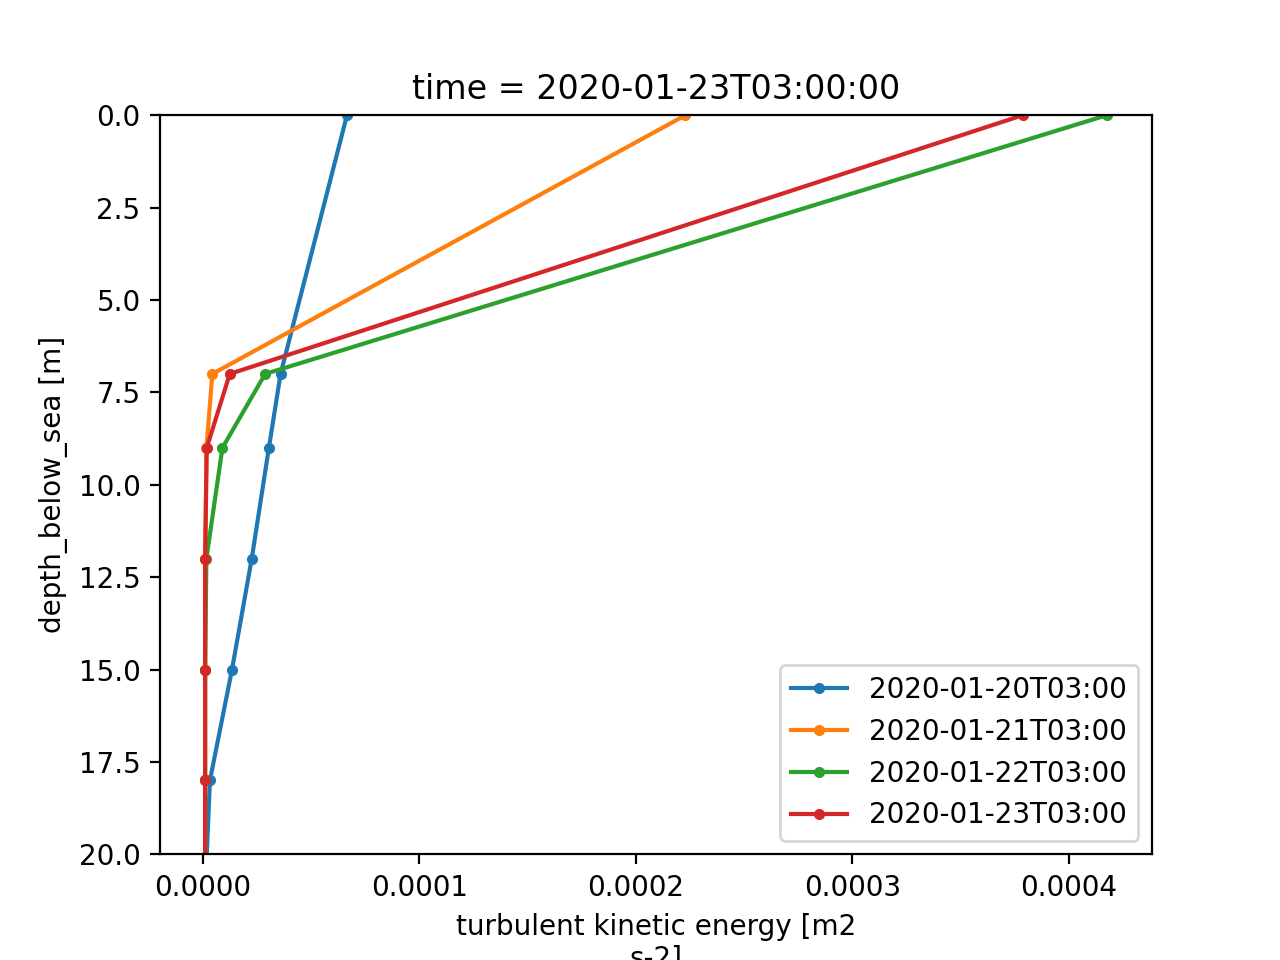

In [72]:
fig = plt.figure()
ax = plt.axes()

tke = ds.tke.isel(ncells=0)

ylim = (20,0)

for ll in np.arange(0,32,8):
    tke[ll,:].plot(ax=ax, marker='.', y='depth_2', ylim=ylim, label=f'{time[ll].data}'[:16])
    
ax.legend()

<IPython.core.display.Javascript object>


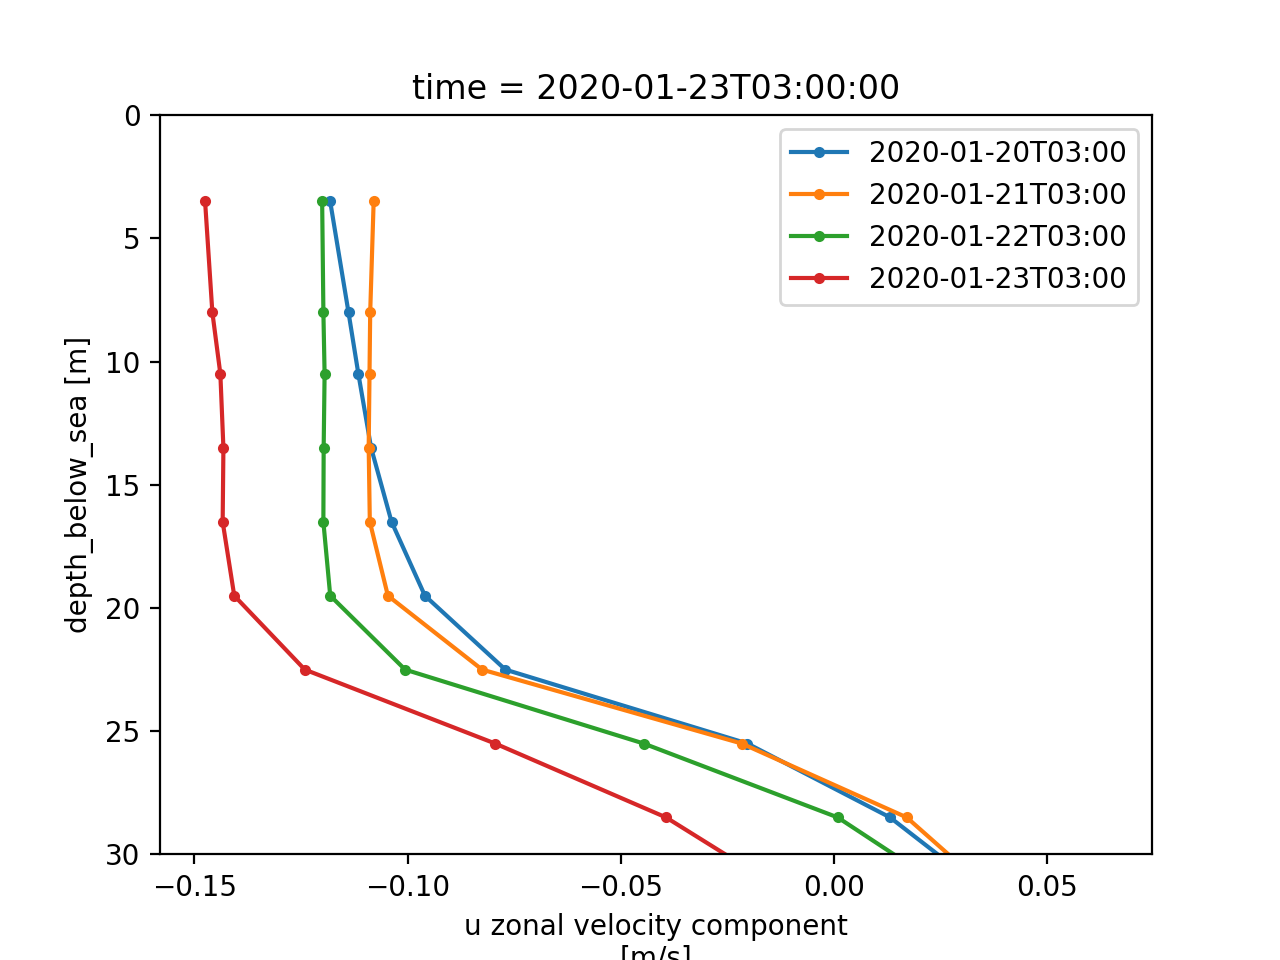

In [90]:
fig = plt.figure()
ax = plt.axes()

da = ds.u.isel(ncells=0)

ylim = (30,0)

for ll in np.arange(0,32,8):
    da[ll,:].plot(ax=ax, marker='.', y='depth', ylim=ylim, label=f'{time[ll].data}'[:16])
    
ax.legend()

<IPython.core.display.Javascript object>


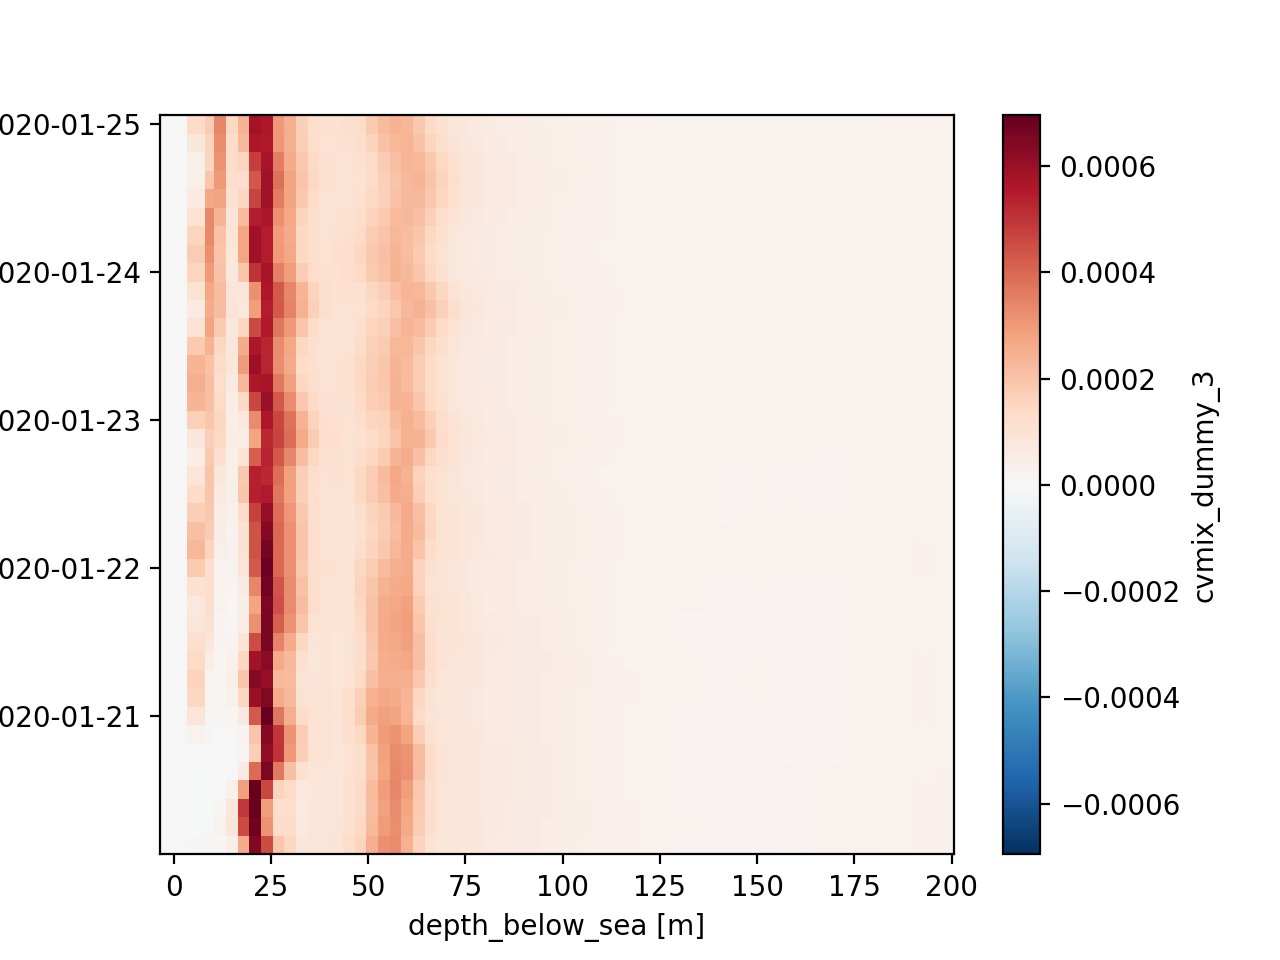

In [86]:
fig = plt.figure()
da.plot()